In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Methods for Computing VaR

1. Historical (Non-parametric)
2. Variance-Covariance (Parametric Gaussian)
3. Parametric Non Gaussian
4. Cornish - Fisher (Semi parametric)


### Historical (Non-parametric)

 - Calculation of VaR based on the distribution of historical changes in the value of the current portfolio under market prices over the specified historical observation window
 - Pros: No assumption about asset return distributions
 - Cons: Since there's no assumption, you're solely relying on historical data. Estimate might be sensitive to the sample period. 


### Parametric Gaussian

 - Calculation of VaR based on portfolio volatility (i.e on volatilities and correlations of components). You have specific assumption about return distribution and focus on the estimate of the parameters of that return distribution. 
 - Considers Z-alpha which is the alpha quantile of the standard normal distribution
 
$$\int ^{Z_{\alpha}}_{-\infty}\frac{1}{\sigma\sqrt{2\pi}}exp\left(\frac{-x^2}{2\sigma^2}\right)dx = \alpha$$

$$Pr\left(\frac{R_p-\mu_p}{\sigma_p}\right)\leq{z_\alpha}=\alpha \Leftrightarrow Pr\left(R\leq\mu_p + z_\alpha \sigma_p\right)=\alpha$$

$$VaR_\alpha=-\left(\mu + z_\alpha\sigma \right)$$

 - Example: Consider a portfolio with a + 0.5% monthly expected return and 4% monthly volatility. What is the 95% monthly Gaussian VaR for the portfolio?

$$VaR_\alpha=-\left(\mu + z_\alpha\sigma \right)$$

$$VaR_\alpha=-\left(0.5\% -1.65 x 4\% \right) = -6.1\%$$

 - Cons: There's a specification risk - running a risk of specifying a wrong model
 - You're taking on a massive amount of more risk simply because you're assuming a Gaussian distribution (which is not a good assumption for asset return distribution)
 
 
### Parametric Non Gaussian

 - Mitigates the problem of estimation riks at the cost of the model risk
 - Can be parametric but non-gaussian
 - Define:
 
$$\bar{F}(x) = P(X>x) = 1-F(x)$$

 - Pareto:
 
$$\bar{F}_\alpha(x) = x^{-\alpha}$$

 - Student with alpha > 0 degrees of freedom
 
$$\bar{F}_\alpha \backsim \alpha^{(\alpha - 1)/2}x^{-\alpha}$$

 - Log Gamma

$$\bar{F}_{\alpha,\beta}(x) \backsim x^{-\alpha}(\text{log x})^{\beta - 1}$$

 - Frechet

$$\bar{F}_{\alpha}(x) = 1 - e^{-x^{-\alpha}}$$


### Cornish-Fisher VaR

 - An alternative to parametric exists semi-parametric approach
 - Does not force to assume any particular distribution
 - Allows to relate the alpha quantile of non-Gaussian distribution to the alpha quantile of the Gaussian distribution
 - Z alpha plus correction factor which is skewness and excess kurtosis of the asset return distribution

$$\tilde{z}_{\alpha} = z_\alpha + \frac{1}{6}\left(z^{2}_{\alpha}-1\right)S + \frac{1}{24}\left(z^{3}_{\alpha}-3z_\alpha\right) \left(K - 3\right) - \frac{1}{36}\left(2z^{3}_{\alpha}-5z_\alpha\right)S^2$$

 - But in cases where skewness is negative and kurtosis is higher than 3, the correction factor will give a VaR estimate that will be different and is typically higher than the Gaussian estimate (will tell that there's a higher of chance of getting a bad negative outcome)
 
$$VaR_{mod}\left(1-\alpha\right) = -\left(\mu + \tilde{z}_{\alpha}\sigma\right)$$

 - Example: Consider an asset with a skewness equal to -1.2 and kurtosis equal to 6. Keeping in mind that Z5%, the critical value for probability 95% is -1.65, indicate what would be the modified critical value for probability 95% using the Cornish Fisher expansion.
 - Answer: -1.90%

### Lab Session: Downside Measures

In [2]:
import edhec_risk_kit as erk

In [3]:
hfi = erk.get_hfi_returns()

### Semi deviation

In [4]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [5]:
# Get return that is lower than average

hfi[hfi < 0].std(ddof=0) # std of hfi < 0, stdev of negative returns

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [6]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR

1. Historic VaR
2. Parametric VaR - Gaussian
3. Modified Cornish-Fisher VaR

### Historic VaR

In [7]:
# Example: Find 5% VaR of hedge fund indices. 
# Meaning what is value at risk at 5% level?

val = pd.DataFrame(-np.percentile(hfi, 5, axis=0))
col = pd.DataFrame(hfi.columns.values)

output = pd.concat([col, val], axis=1)
output.columns = ['Strategy', 'VaR at 5%']
output

,Strategy,VaR at 5%
0,Convertible Arbitrage,0.01576
1,CTA Global,0.03169
2,Distressed Securities,0.01966
3,Emerging Markets,0.04247
4,Equity Market Neutral,0.00814
5,Event Driven,0.02535
6,Fixed Income Arbitrage,0.00787
7,Global Macro,0.01499
8,Long/Short Equity,0.02598
9,Merger Arbitrage,0.01047


In [8]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Parametric Gaussian

$$VaR_\alpha=-\left(\mu + z_\alpha\sigma \right)$$

In [9]:
# Z-score: Percent point function in scipy.stats

norm.ppf(0.05)

-1.6448536269514729

In [10]:
# Z-score at 5% VaR
z = norm.ppf(0.05)

z

-1.6448536269514729

In [11]:
-(hfi.mean() + (z * hfi.std(ddof=0)))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [12]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### Modified Cornish-Fisher VaR

$$\tilde{z}_{\alpha} = z_\alpha + \frac{1}{6}\left(z^{2}_{\alpha}-1\right)S + \frac{1}{24}\left(z^{3}_{\alpha}-3z_\alpha\right) \left(K - 3\right) - \frac{1}{36}\left(2z^{3}_{\alpha}-5z_\alpha\right)S^2$$


$$VaR_{mod}\left(1-\alpha\right) = -\left(\mu + \tilde{z}_{\alpha}\sigma\right)$$

In [13]:
var_list = [erk.var_historic(hfi),
            erk.var_gaussian(hfi),
            erk.var_gaussian(hfi, modified=True)]

comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Historic', 'Gaussian', 'Cornish-Fisher']

comparison

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.01576,0.021691,0.025166
CTA Global,0.03169,0.034235,0.033094
Distressed Securities,0.01966,0.021032,0.025102
Emerging Markets,0.04247,0.047164,0.053011
Equity Market Neutral,0.00814,0.008850,0.010734
Event Driven,0.02535,0.021144,0.025516
Fixed Income Arbitrage,0.00787,0.014579,0.017881
Global Macro,0.01499,0.018766,0.013581
Long/Short Equity,0.02598,0.026397,0.027935
Merger Arbitrage,0.01047,0.010435,0.012612


<AxesSubplot:title={'center':'EDHEC HFI: VaR'}>

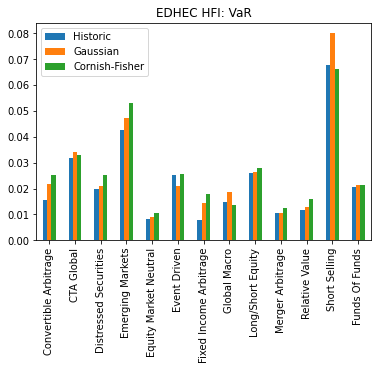

In [14]:
# Plot

comparison.plot.bar(title='EDHEC HFI: VaR')

# Note that VaR for different methods are different

### Beyond VaR aka CVaR

In [15]:
erk.cvar_historic(hfi)

# If the 5% chance happens, that is the worst 5% of the possible cases
# When those things happen, the average of that is 3.6% loss in a month
# if you invested in CA hfi

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64